# CNN ARCHITECTURE FOR IMAGE CLASSIFICATION 

# IMPORTING MODULES

 This cell consists of the modules to be included for building the CNN architecture 

In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# ONE HOT ENCODER

 for including two classes(having tumor and not having tumor)

In [2]:
encoder = OneHotEncoder()   #Including Categorial_features
encoder.fit([[0], [1]])

#0= YES
#1= NO


OneHotEncoder()

# LOADING OF DATA

Importing list
data list for storing image data in numpy array form
path list for storing path of each image
result list for storing one hot encoder

In [3]:
data = []
paths = []      
result = []

for r, d, f in os.walk('./dataset/yes'):  # Including the dataset containing Images with Tumor
    for file in f:   
        if '.jpg' in file:  # appending files only if it is in jpg format in folder f 
            paths.append(os.path.join(r, file))   # Appending the path of files 

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))       # resizing of images 
    img = np.array(img)               # storing images in numpy form 
    if(img.shape == (128,128,3)):
        data.append(np.array(img))    #appending images in data list
        result.append(encoder.transform([[0]]).toarray()) # storing images of having tumor in result list

In [4]:
paths = []
for r, d, f in os.walk('./dataset/no'):   # Including the dataset containing Tumor-free Brain
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))  #Appending the files using os to include path 

for path in paths:     # Iterating through each image
    img = Image.open(path)      
    img = img.resize((128,128))   # resizing of images 
    img = np.array(img)           # storing the images as an array using numpy library 
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())     # storing images of not having tumor in result list

In [5]:
data = np.array(data)    # storing image data in numpy array
data.shape

(70, 128, 128, 3)

In [6]:
result = np.array(result)         # converting data in numpy form 
result = result.reshape(70,2)     # reshaping the resulting images 

# SPLITTING THE DATA

 splitting the dataset in training and testing validation 

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# BUILDING THE MODEL

Building the model in sequential form using batchNormalisation Technique

In [8]:
model = Sequential()  # sequential model

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))   # adding conv2D layes
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))    # adding activation function 


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))    # adding next layer of CNN 
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())   #to convert image into 1 dimensional array

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 classes are involved 

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics=['accuracy'])  # compiling the model 
print(model.summary())

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


Training the model 

In [9]:
y_train.shape

(56, 2)

In [10]:
history = model.fit(x_train, y_train ,validation_split = 0.2, epochs=20, batch_size=32)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6222 - loss: 4.2412 - val_accuracy: 0.5833 - val_loss: 52.3144
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8466 - loss: 10.6469 - val_accuracy: 0.5000 - val_loss: 73.5009
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9081 - loss: 3.5010 - val_accuracy: 0.3333 - val_loss: 34.2611
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 988ms/step - accuracy: 0.8314 - loss: 5.7428 - val_accuracy: 0.5000 - val_loss: 43.4410
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9337 - loss: 1.0627 - val_accuracy: 0.5000 - val_loss: 50.6643
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9744 - loss: 0.5904 - val_accuracy: 0.5000 - val_loss: 50.6332
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9489 - loss: 0.5042 - val_accuracy: 0.5000 - val_loss: 47.5670
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 983ms/step - accuracy: 0.9593 - loss: 0.8090 - val_accuracy: 0.5000 - val_loss: 48.9440
E

# PLOT LOSS AND ACCURACY OF MODEL

 PLOT FOR MODEL LOSS using matplotlib 

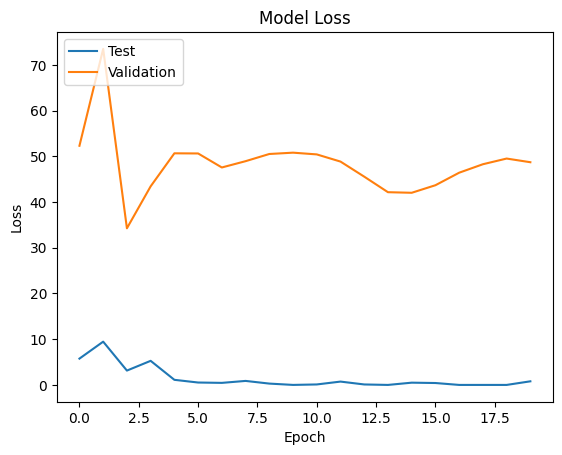

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

PLOT FOR MODEL ACCURACY

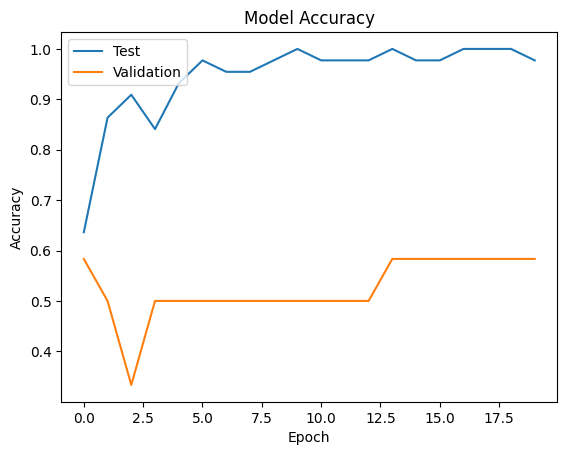

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [13]:
def names(number):     # Defining a function 
    if number==0:
        return 'Yes'
    else:
        return 'No'

# CHECKING THE MODEL

checking the model for random image

55.987387895584106%No


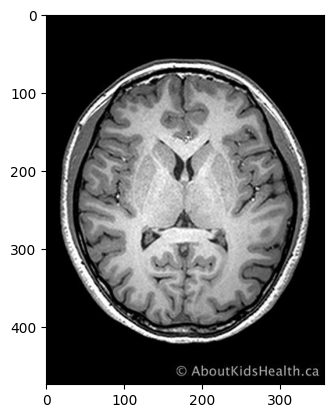

In [14]:
from matplotlib.pyplot import imshow
img = Image.open("./dataset/no/45 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)    # reshaping 
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ "%" + names(classification))

100.0%Yes


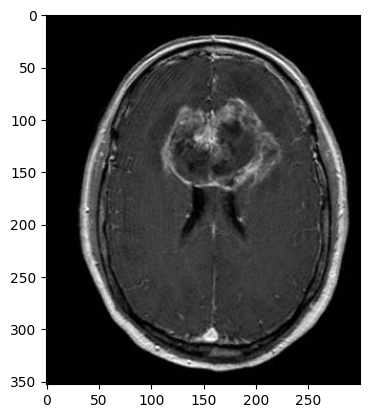

In [15]:
from matplotlib.pyplot import imshow
img = Image.open("./dataset/yes/Y77.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ "%" + names(classification))